In [6]:
%matplotlib inline

In [14]:
import numpy as np

import pickle, os, math, gzip
import multiprocessing as mp
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
from sklearn import gaussian_process
from sklearn import preprocessing
from sklearn import neural_network

from scipy import stats

In [15]:
def plot_errors(y1, y2):
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(y1, y2)
    n, bins, patches = ax2.hist(y1-y2, 50, facecolor='green', alpha=0.75)

In [16]:
def eval_regressors(dataset_label):
    label = dataset_label
    
    # load the training and the validation data
    train = pickle.load(gzip.open('data/datasets/train_%s.pklz' % label, 'rb'))
    X_train, y_train = train['X'], train['y']

    # compute the mean and the std
    scaler = preprocessing.StandardScaler().fit(X_train)
    # subtract the mean and divide by the std
    X_train = scaler.transform(X_train)
    
    stats_res = stats.describe(y_train)    
    n, bins, patches = plt.hist(y_train, 50, normed=1, facecolor='green', alpha=0.75)
    plt.grid(True)
    plt.title('target data distribution: %s $\mu=%0.2g,\sigma=%0.2g$' % (label, stats_res.mean, math.sqrt(stats_res.variance)))
    plt.show()

    valid = pickle.load(gzip.open('data/datasets/valid_%s.pklz' % label, 'rb'))
    X_valid, y_valid = scaler.transform(valid['X']), valid['y']

    n_estimators = 100
    models = [#('linear regression', linear_model.LinearRegression()),
              #('ridge regression', linear_model.Ridge(alpha=.5)),
              ('Ridge regression with CV', linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])),
              ('RF', RandomForestRegressor(n_estimators=n_estimators, n_jobs=mp.cpu_count())),
              #('LASSO', linear_model.Lasso(alpha = 0.1)),
              #('ElasticNet', linear_model.ElasticNetCV()),
              #('LARS', linear_model.Lars()),
              #('OMP', linear_model.OrthogonalMatchingPursuit()),
              #('Bayesian Ridge', linear_model.BayesianRidge()),
              #('Bayesian ARD', linear_model.ARDRegression()),
              #('Perceptron', linear_model.Perceptron()),
              #('Passive-Aggressive', linear_model.PassiveAggressiveRegressor()),
              #('SVR', svm.SVR()),
              #('Gaussian Processes', gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)),
              ('MLP', neural_network.MLPRegressor()),
              ('GB', GradientBoostingRegressor()),
              ('ExRF', ExtraTreesRegressor(n_estimators=n_estimators, n_jobs=mp.cpu_count()))
            ]
    
    for tag, clf in models:
        print('model:', tag)
        start = timer()
        clf.fit(X_train, y_train)
        end = timer()
        print('%s, fit wall time:' % label, end-start)
    
        # compute the predictions the validation data
        y_pred = clf.predict(X_valid)
        mse = mean_squared_error(y_pred, y_valid)
        print("RMSE: %.2f" % math.sqrt(mse), 'Variance score: %.2f' % clf.score(X_valid, y_valid))
        plot_errors(y_pred, y_valid)
        plt.show()

    #with open(os.path.join('models', 'rf_%s.pkl' % label), 'wb') as fid:
    #    pickle.dump(rf, fid)

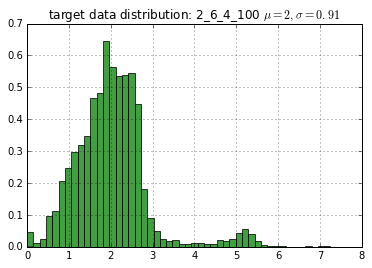

model: Ridge regression with CV
2_6_4_100, fit wall time: 27.93921649600088
RMSE: 0.57 Variance score: 0.61


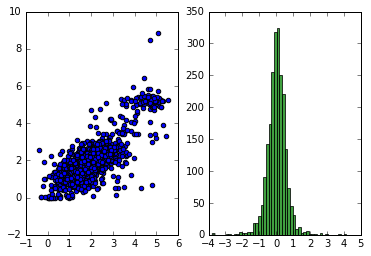

model: RF
2_6_4_100, fit wall time: 195.6976063280017
RMSE: 0.50 Variance score: 0.70


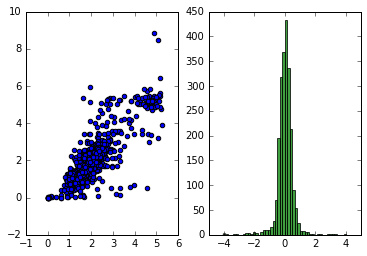

model: MLP
2_6_4_100, fit wall time: 14.784976566996193
RMSE: 0.80 Variance score: 0.23


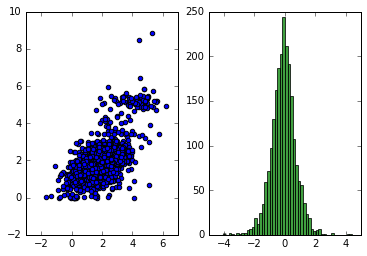

model: GB
2_6_4_100, fit wall time: 132.92536642900086
RMSE: 0.56 Variance score: 0.63


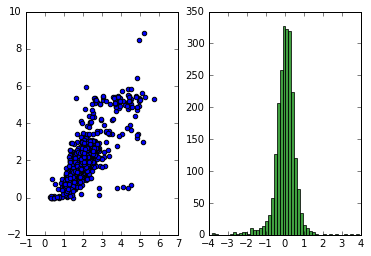

model: ExRF
2_6_4_100, fit wall time: 326.52003702799266
RMSE: 0.47 Variance score: 0.74


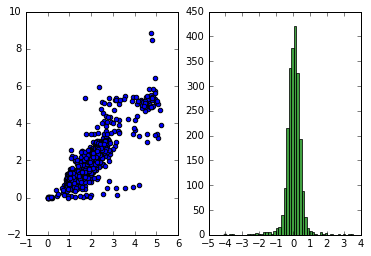

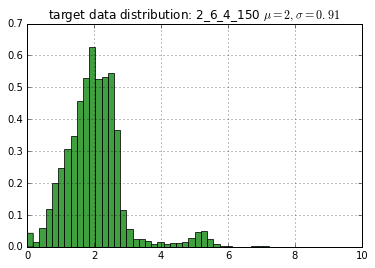

model: Ridge regression with CV
2_6_4_150, fit wall time: 100.7710503559938
RMSE: 0.67 Variance score: 0.45


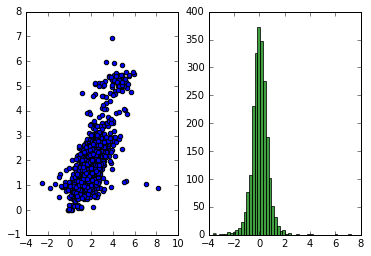

model: RF
2_6_4_150, fit wall time: 303.3721033089969
RMSE: 0.47 Variance score: 0.73


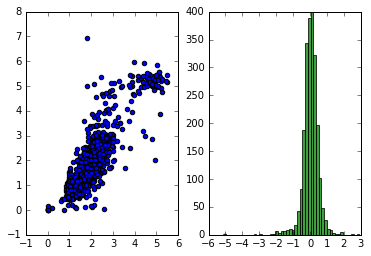

model: MLP
2_6_4_150, fit wall time: 29.50399593000475
RMSE: 0.78 Variance score: 0.25


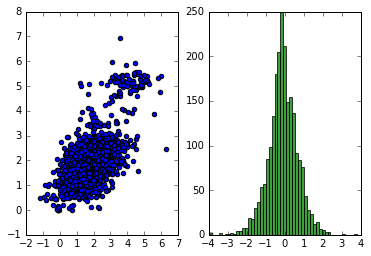

model: GB
2_6_4_150, fit wall time: 242.1667643200053
RMSE: 0.53 Variance score: 0.66


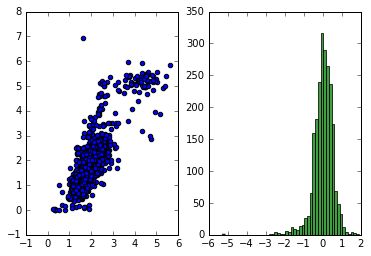

model: ExRF
2_6_4_150, fit wall time: 634.2363616989896
RMSE: 0.43 Variance score: 0.77


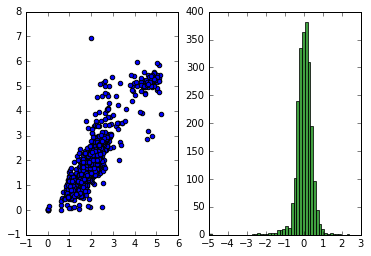

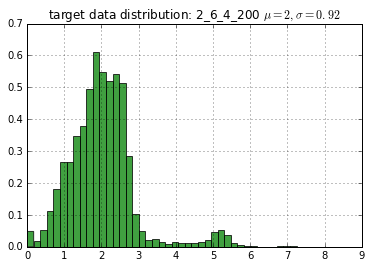

model: Ridge regression with CV
2_6_4_200, fit wall time: 260.1530724460026
RMSE: 1.03 Variance score: -0.39


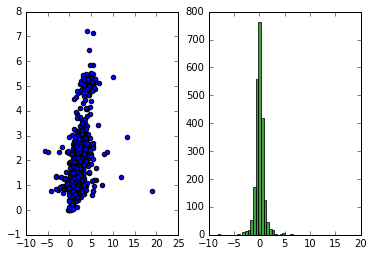

model: RF
2_6_4_200, fit wall time: 385.8538534529944
RMSE: 0.48 Variance score: 0.70


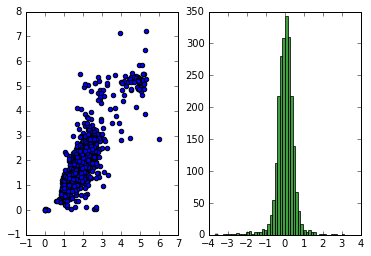

model: MLP
2_6_4_200, fit wall time: 38.766733641998144
RMSE: 1.27 Variance score: -1.11


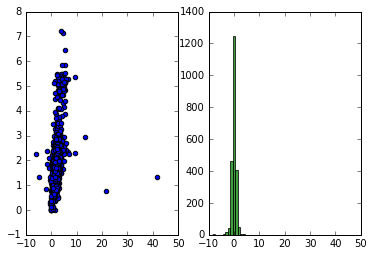

model: GB
2_6_4_200, fit wall time: 264.30774722699425
RMSE: 0.53 Variance score: 0.64


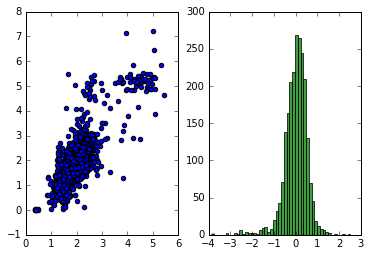

model: ExRF
2_6_4_200, fit wall time: 739.8274969560007
RMSE: 0.43 Variance score: 0.76


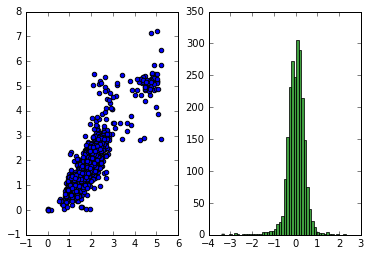

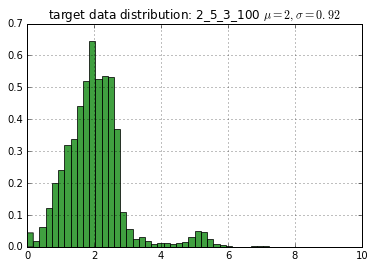

model: Ridge regression with CV
2_5_3_100, fit wall time: 15.81233640400751
RMSE: 0.62 Variance score: 0.54


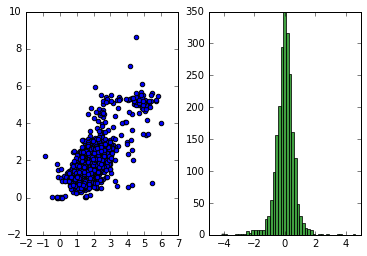

model: RF
2_5_3_100, fit wall time: 121.19865985900105
RMSE: 0.47 Variance score: 0.73


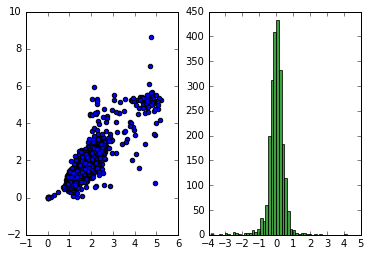

model: MLP
2_5_3_100, fit wall time: 8.625518146000104
RMSE: 0.76 Variance score: 0.31


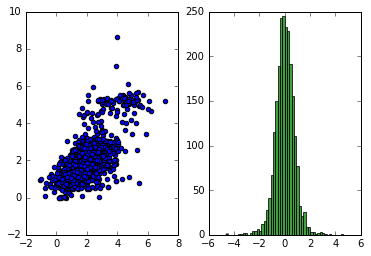

model: GB
2_5_3_100, fit wall time: 76.38600261200918
RMSE: 0.52 Variance score: 0.68


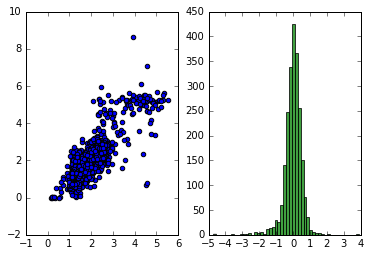

model: ExRF
2_5_3_100, fit wall time: 150.24835917999735
RMSE: 0.45 Variance score: 0.76


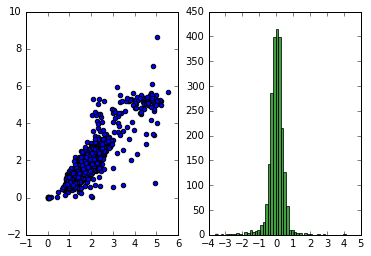

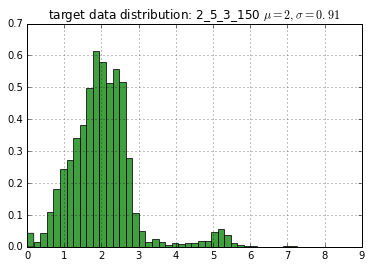

model: Ridge regression with CV
2_5_3_150, fit wall time: 28.71218257000146
RMSE: 0.64 Variance score: 0.50


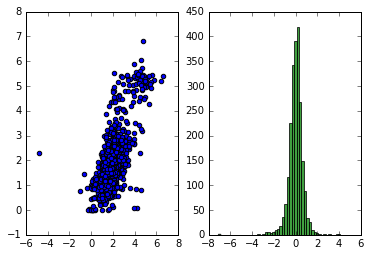

model: RF
2_5_3_150, fit wall time: 155.87692850800522
RMSE: 0.46 Variance score: 0.73


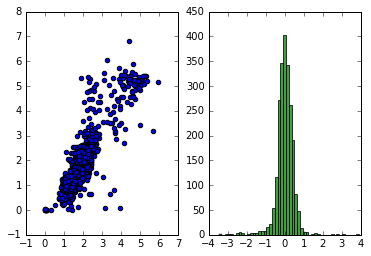

model: MLP
2_5_3_150, fit wall time: 10.387669048999669
RMSE: 0.78 Variance score: 0.24


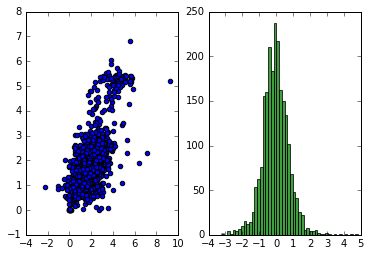

model: GB
2_5_3_150, fit wall time: 112.36850099399453
RMSE: 0.50 Variance score: 0.69


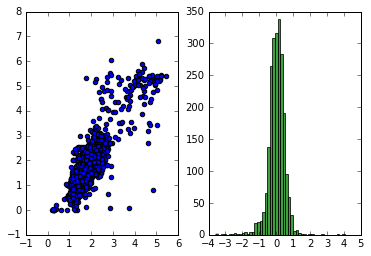

model: ExRF
2_5_3_150, fit wall time: 232.1939887519984
RMSE: 0.44 Variance score: 0.76


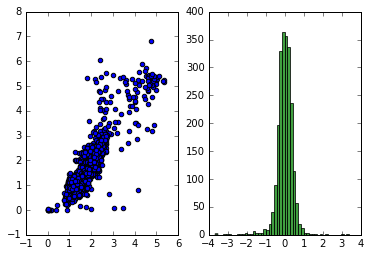

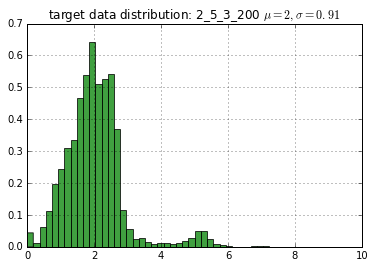

model: Ridge regression with CV
2_5_3_200, fit wall time: 53.55254770300235
RMSE: 1.23 Variance score: -0.77


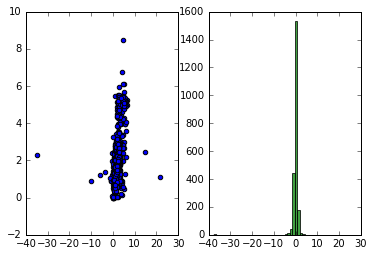

model: RF
2_5_3_200, fit wall time: 185.76915349299088
RMSE: 0.50 Variance score: 0.70


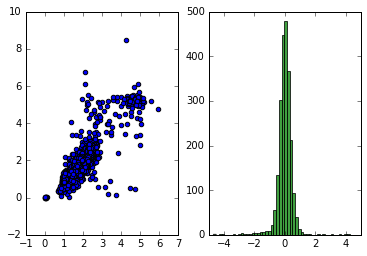

model: MLP
2_5_3_200, fit wall time: 12.436508074009907
RMSE: 6.37 Variance score: -46.92


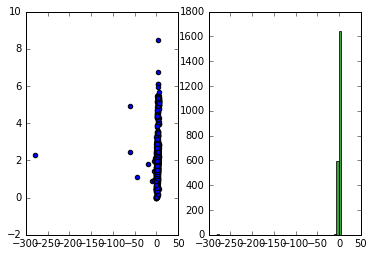

model: GB
2_5_3_200, fit wall time: 144.28518710799108
RMSE: 0.54 Variance score: 0.65


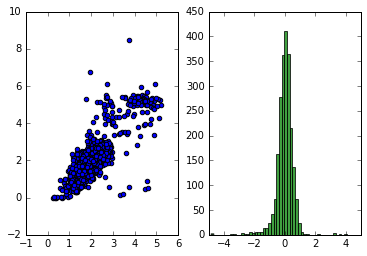

model: ExRF
2_5_3_200, fit wall time: 308.3375134560047
RMSE: 0.48 Variance score: 0.73


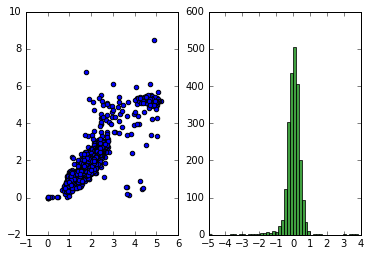

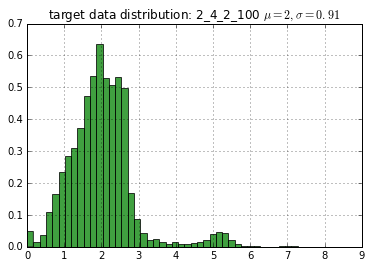

model: Ridge regression with CV
2_4_2_100, fit wall time: 2.5866655290010385
RMSE: 0.78 Variance score: 0.27


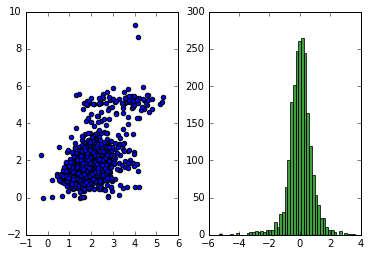

model: RF
2_4_2_100, fit wall time: 92.41799127399281
RMSE: 0.58 Variance score: 0.59


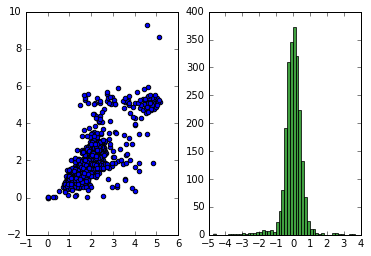

model: MLP
2_4_2_100, fit wall time: 11.09484797299956
RMSE: 0.84 Variance score: 0.15


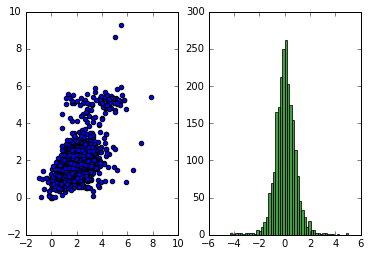

model: GB
2_4_2_100, fit wall time: 43.11539297600393
RMSE: 0.64 Variance score: 0.50


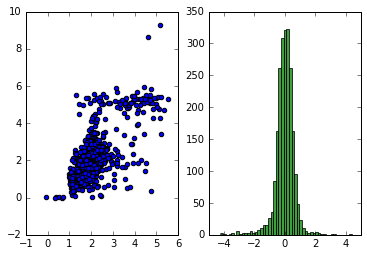

model: ExRF
2_4_2_100, fit wall time: 83.96589436200156
RMSE: 0.56 Variance score: 0.62


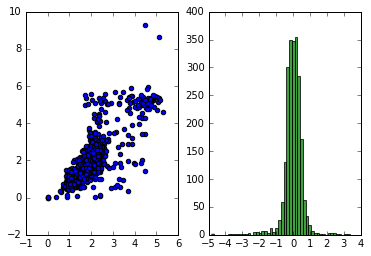

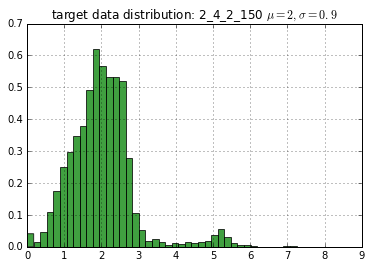

model: Ridge regression with CV
2_4_2_150, fit wall time: 6.5717194309982006
RMSE: 0.78 Variance score: 0.31


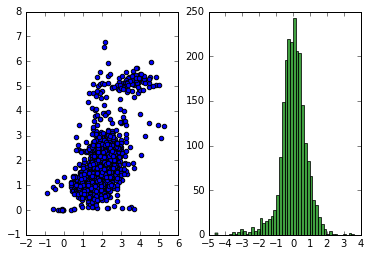

model: RF
2_4_2_150, fit wall time: 120.38418344699312
RMSE: 0.58 Variance score: 0.63


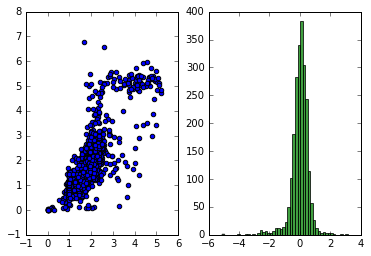

model: MLP
2_4_2_150, fit wall time: 20.53787653600739
RMSE: 0.82 Variance score: 0.24


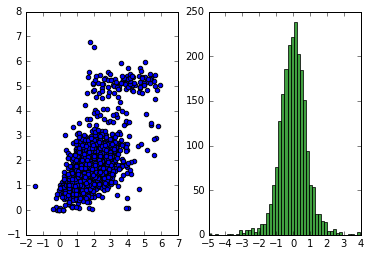

model: GB
2_4_2_150, fit wall time: 61.26180440900498
RMSE: 0.65 Variance score: 0.53


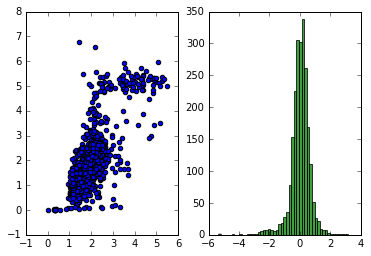

model: ExRF
2_4_2_150, fit wall time: 131.9774065340025
RMSE: 0.55 Variance score: 0.66


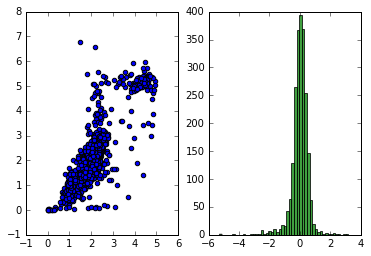

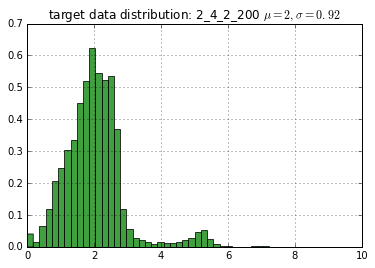

model: Ridge regression with CV
2_4_2_200, fit wall time: 12.14288152300287
RMSE: 1.07 Variance score: -0.36


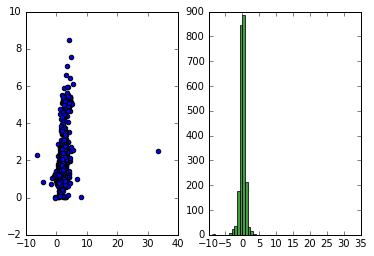

model: RF
2_4_2_200, fit wall time: 155.4174756680004
RMSE: 0.56 Variance score: 0.63


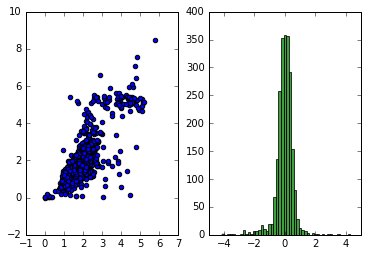

model: MLP
2_4_2_200, fit wall time: 16.785094220991596
RMSE: 1.86 Variance score: -3.07


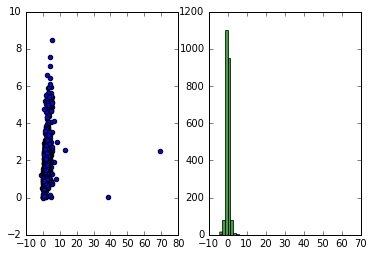

model: GB
2_4_2_200, fit wall time: 89.13919102700311
RMSE: 0.62 Variance score: 0.55


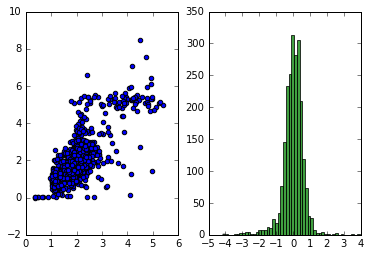

model: ExRF
2_4_2_200, fit wall time: 209.20088612800464
RMSE: 0.52 Variance score: 0.68


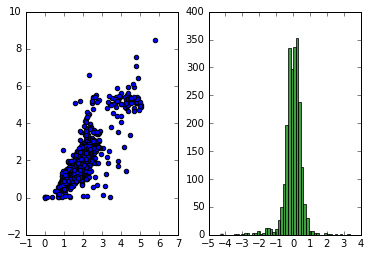

In [17]:
labels = []

grids = list(zip([6,5,4], [4,3,2]))
nbins = [100, 150, 200]

for grid in grids:
    for nb in nbins:
        labels.append('2_%d_%d_%d' % (grid[0], grid[1], nb))

for label in labels:
    eval_regressors(label)